In [2]:
import pandas as pd
import numpy as np
import math
from sklearn import model_selection
import platform
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc

#연습경기 성정
pre_season = pd.read_csv('../data/Pre_Season_Batter2.csv')

#정규시즌 성적을 포함하여 개인정보
regular_season = pd.read_csv('../data/Regular_Season_Batter2.csv')

day_by_day_of = pd.read_csv('../data/Regular_Season_Batter_Day_by_Day_b42.csv')



# 타자들의 일자 별 정규시즌 성적
regular_season_batter = pd.read_csv('../data/Regular_Season_Batter_Day_by_Day_b42.csv')
if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="C:\Windows\Fonts\malgun.ttf").get_name()
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
regular_season=regular_season.drop(columns=['Unnamed: 0'],axis=1)


pre_season=pre_season.drop(columns=['Unnamed: 0'],axis=1)

day_by_day_of=day_by_day_of.drop(columns=['Unnamed: 0'],axis=1)


In [4]:
regular_season.isnull().sum(axis=0)

batter_id                  0
batter_name                0
year                       0
team                       0
avg                       26
G                          0
AB                         0
R                          0
H                          0
2B                         0
3B                         0
HR                         0
TB                         0
RBI                        0
SB                         0
CS                         0
BB                         0
HBP                        0
SO                         0
GDP                        0
SLG                       26
OBP                       24
E                          0
height/weight            802
year_born                  0
position                 802
career                     0
starting_salary         1067
OPS                       26
weight                   802
height                   802
weight_per_height        802
hit_way                  802
pos                      802
country       

# 결측치 처리 및 데이터 오류 처리
## 수치형 데이터 변경

In [5]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_col = regular_season.select_dtypes(include=numerics).columns

In [6]:
num_col

Index(['batter_id', 'year', 'avg', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'TB',
       'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP', 'SLG', 'OBP', 'E', 'OPS',
       'weight', 'height', 'weight_per_height', 'starting_salary_list'],
      dtype='object')

In [7]:
#regular_season.isnull() == regular_season.isna() 같은거
regular_season.loc[regular_season.isnull().sum(axis=1)> 0, num_col].head()



,batter_id,year,avg,G,AB,R,H,2B,3B,HR,...,SO,GDP,SLG,OBP,E,OPS,weight,height,weight_per_height,starting_salary_list
0,0,2018,0.339,50,183,27,62,9,0,8,...,25,3,0.519000,0.383000,9,0.902000,93.0,177.0,0.525424,NaN
12,138,2005,0.127,39,63,9,8,2,0,0,...,15,1,0.158730,0.256757,3,0.415487,NaN,NaN,NaN,NaN
13,138,2006,0.139,37,36,6,5,2,0,0,...,14,0,0.194444,0.326087,4,0.520531,NaN,NaN,NaN,NaN
14,138,2007,0.000,8,4,3,0,0,0,0,...,2,1,0.000000,0.000000,0,0.000000,NaN,NaN,NaN,NaN
15,138,2008,0.000,2,1,0,0,0,0,0,...,0,0,0.000000,0.000000,0,0.000000,NaN,NaN,NaN,NaN


In [8]:
regular_season[regular_season.select_dtypes(include=numerics).columns] = regular_season[regular_season.select_dtypes(include=numerics).columns].fillna(0)

In [9]:
regular_season

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,career,starting_salary,OPS,weight,height,weight_per_height,hit_way,pos,country,starting_salary_list
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902,93.0,177.0,0.525424,우타,내야수,foreign,0.0
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,광주대성초-광주동성중-광주동성고,10000만원,0.000,72.0,180.0,0.400000,좌타,내야수,korea,10000.0
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,광주대성초-광주동성중-광주동성고,10000만원,0.686,72.0,180.0,0.400000,좌타,내야수,korea,10000.0
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,광주대성초-광주동성중-광주동성고,10000만원,0.673,72.0,180.0,0.400000,좌타,내야수,korea,10000.0
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,광주대성초-광주동성중-광주동성고,10000만원,0.489,72.0,180.0,0.400000,좌타,내야수,korea,10000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2449,344,황진수,2014,롯데,0.000,5,5,0,0,0,...,석천초-대헌중-공주고,4000만원,0.000,82.0,181.0,0.453039,양타,내야수,korea,4000.0
2450,344,황진수,2015,롯데,0.000,2,2,0,0,0,...,석천초-대헌중-공주고,4000만원,0.000,82.0,181.0,0.453039,양타,내야수,korea,4000.0
2451,344,황진수,2016,롯데,0.000,11,10,2,0,0,...,석천초-대헌중-공주고,4000만원,0.000,82.0,181.0,0.453039,양타,내야수,korea,4000.0
2452,344,황진수,2017,롯데,0.291,60,117,18,34,6,...,석천초-대헌중-공주고,4000만원,0.761,82.0,181.0,0.453039,양타,내야수,korea,4000.0


In [10]:
regular_season_batter=regular_season_batter.drop(columns=['Unnamed: 0'],axis=1)
regular_season_batter

,batter_id,batter_name,date,opposing_team,avg1,AB,R,H,2B,3B,...,RBI,SB,CS,BB,HBP,SO,GDP,avg2,year,month
0,0,가르시아,3.24,NC,0.333,3,1,1,0,0,...,0,0,0,1,0,1,0,0.333,2018,3
1,0,가르시아,3.25,NC,0.000,4,0,0,0,0,...,0,0,0,0,0,1,0,0.143,2018,3
2,0,가르시아,3.27,넥센,0.200,5,0,1,0,0,...,0,0,0,0,0,0,0,0.167,2018,3
3,0,가르시아,3.28,넥센,0.200,5,1,1,0,0,...,1,0,0,0,0,0,0,0.176,2018,3
4,0,가르시아,3.29,넥센,0.250,4,0,1,0,0,...,3,0,0,0,0,0,1,0.190,2018,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112268,344,황진수,6.23,LG,-,0,0,0,0,0,...,0,0,0,1,0,0,0,0.158,2018,6
112269,344,황진수,6.26,넥센,0.000,1,0,0,0,0,...,0,0,0,0,0,1,0,0.150,2018,6
112270,344,황진수,6.27,넥센,0.500,2,1,1,1,0,...,0,0,0,0,0,1,0,0.182,2018,6
112271,344,황진수,6.28,넥센,-,0,0,0,0,0,...,0,0,0,0,0,0,0,0.182,2018,6


In [11]:
types = regular_season_batter.dtypes

In [12]:
type_list = []
for temp in types:
    type_list.append(temp)

In [13]:
result = set(type_list)

In [14]:
type_list = ['int64', 'float64']

regular_season_batter[regular_season_batter.select_dtypes(include=type_list).columns] = regular_season_batter[regular_season_batter.select_dtypes(include=type_list).columns].fillna(0)
#regular_season[regular_season.select_dtypes(include=numerics).columns] = regular_season[regular_season.select_dtypes(include=numerics).columns].fillna(0)

In [15]:
regular_season_batter.isnull().sum(axis=0)

batter_id        0
batter_name      0
date             0
opposing_team    0
avg1             0
AB               0
R                0
H                0
2B               0
3B               0
HR               0
RBI              0
SB               0
CS               0
BB               0
HBP              0
SO               0
GDP              0
avg2             0
year             0
month            0
dtype: int64

In [16]:
pre_season[pre_season.select_dtypes(include=numerics).columns] = pre_season[pre_season.select_dtypes(include=numerics).columns].fillna(0)

In [17]:
pre_season.isnull().sum(axis=0)

batter_id            0
batter_name          0
year                 0
team                 0
avg                  0
G                    0
AB                   0
R                    0
H                    0
2B                   0
3B                   0
HR                   0
TB                   0
RBI                  0
SB                   0
CS                   0
BB                   0
HBP                  0
SO                   0
GDP                  0
SLG                  0
OBP                  0
E                    0
height/weight        0
year_born            0
position             0
career               0
starting_salary    207
OPS                  0
new_idx              0
dtype: int64

## 비 수치형 데이터 변경

In [18]:
not_number = [x for x in regular_season.columns if x not in num_col]

In [19]:
not_number

['batter_name',
 'team',
 'height/weight',
 'year_born',
 'position',
 'career',
 'starting_salary',
 'hit_way',
 'pos',
 'country']

In [20]:
regular_season.loc[regular_season[not_number].isnull().sum(axis=1) > 0,not_number]

,batter_name,team,height/weight,year_born,position,career,starting_salary,hit_way,pos,country
0,가르시아,LG,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,우타,내야수,foreign
12,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,NaN,NaN,NaN,korea
13,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,NaN,NaN,NaN,korea
14,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,NaN,NaN,NaN,korea
15,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,NaN,NaN,NaN,korea
...,...,...,...,...,...,...,...,...,...,...
2427,황선일,LG,NaN,1987년 02월 17일,NaN,군산중앙초-군산중-군산상고-LG-상무-LG,NaN,NaN,NaN,korea
2428,황선일,LG,NaN,1987년 02월 17일,NaN,군산중앙초-군산중-군산상고-LG-상무-LG,NaN,NaN,NaN,korea
2429,황선일,한화,NaN,1987년 02월 17일,NaN,군산중앙초-군산중-군산상고-LG-상무-LG,NaN,NaN,NaN,korea
2445,황정립,KIA,NaN,1989년 12월 14일,NaN,학동초-경원중-배명고-고려대,NaN,NaN,NaN,korea


# 즉 loc는 조건문이랑 비슷하다 SQL문에 Select 비슷한 개념
## 내가 원하는 데이터만 추출하는 것이 최종 목표

In [21]:
drop_idx=regular_season.loc[
    #안타가 0개 이상이면서 장타율이 0인 사람
    ((regular_season['H'] > 0) & (regular_season['SLG' ] == 0)) |

    #안타가 0개 이상 혹은 볼넥이 0개 이상 혹은 맞은 볼이 0개 이상인 사람
    (((regular_season['H'] >0) |
    (regular_season['BB'] >0) |
    (regular_season['HBP'] > 0)) &
    (regular_season['OBP'] == 0))
].index

In [22]:
regular_season = regular_season.drop(index=drop_idx).reset_index(drop=True)
regular_season

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,career,starting_salary,OPS,weight,height,weight_per_height,hit_way,pos,country,starting_salary_list
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902,93.0,177.0,0.525424,우타,내야수,foreign,0.0
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,광주대성초-광주동성중-광주동성고,10000만원,0.000,72.0,180.0,0.400000,좌타,내야수,korea,10000.0
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,광주대성초-광주동성중-광주동성고,10000만원,0.686,72.0,180.0,0.400000,좌타,내야수,korea,10000.0
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,광주대성초-광주동성중-광주동성고,10000만원,0.673,72.0,180.0,0.400000,좌타,내야수,korea,10000.0
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,광주대성초-광주동성중-광주동성고,10000만원,0.489,72.0,180.0,0.400000,좌타,내야수,korea,10000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2442,344,황진수,2014,롯데,0.000,5,5,0,0,0,...,석천초-대헌중-공주고,4000만원,0.000,82.0,181.0,0.453039,양타,내야수,korea,4000.0
2443,344,황진수,2015,롯데,0.000,2,2,0,0,0,...,석천초-대헌중-공주고,4000만원,0.000,82.0,181.0,0.453039,양타,내야수,korea,4000.0
2444,344,황진수,2016,롯데,0.000,11,10,2,0,0,...,석천초-대헌중-공주고,4000만원,0.000,82.0,181.0,0.453039,양타,내야수,korea,4000.0
2445,344,황진수,2017,롯데,0.291,60,117,18,34,6,...,석천초-대헌중-공주고,4000만원,0.761,82.0,181.0,0.453039,양타,내야수,korea,4000.0


# 규정 타수 정의

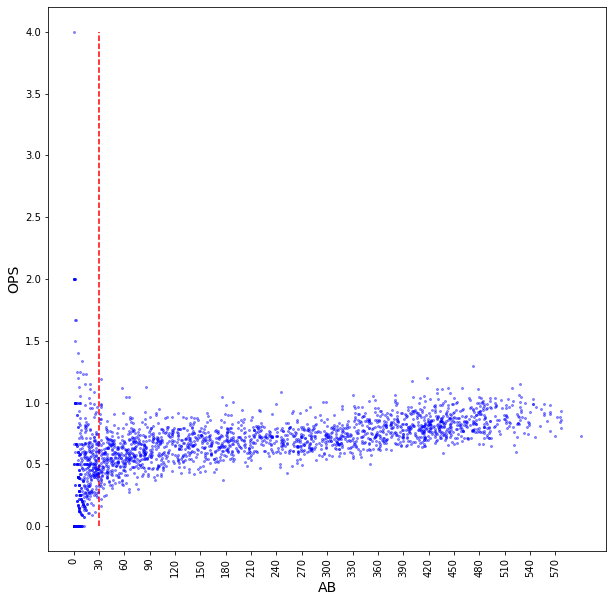

In [23]:
plt.figure(figsize=(10,10))
plt.plot('AB', 'OPS', data=regular_season, linestyle='none', marker='o', markersize=2, color='blue', alpha=0.4)
plt.xlabel('AB', fontsize=14)
plt.ylabel('OPS', fontsize=14)

#눈금 표시
plt.xticks(list(range(min(regular_season['AB']), max(regular_season['AB']), 30)), rotation=90)
#plt.vlines(30, ymin=(regular_season['OPS']),ymax=max(regular_season['OPS']), linestyles='dashed', colors='r')
plt.vlines(30, ymin=min(regular_season['OPS']),ymax=max(regular_season['OPS']), linestyles='dashed', colors='r')

#수평선 만들기
plt.show()

In [24]:
Q1 = regular_season['OPS'].quantile(0.25)
Q3 = regular_season['OPS'].quantile(0.75)

In [25]:
IQR =Q3 -Q1
IQR

0.2554267515923566

In [26]:
x=regular_season['OPS'].values
normalization = (x - x.mean())/x.std()
normalization = np.sort(normalization)

In [27]:
y = (1 / np.sqrt(2 * np.pi)) * np.exp(- normalization ** 2 / 2 )
y

array([2.14580478e-02, 2.14580478e-02, 2.14580478e-02, ...,
       9.91542366e-07, 9.91542366e-07, 1.75525626e-35])

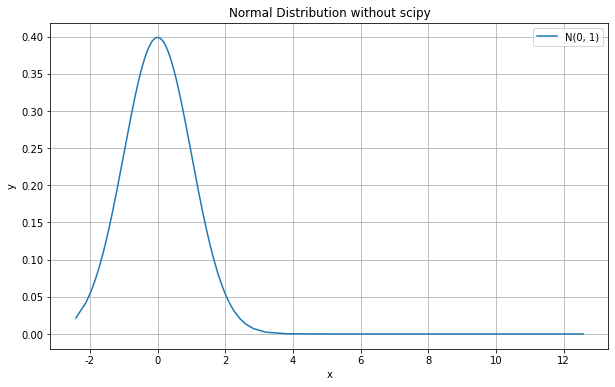

In [28]:
plt.figure(figsize=(10, 6))          # 플롯 사이즈 지정
plt.plot(normalization, y)
plt.xlabel("x")                      # x축 레이블 지정
plt.ylabel("y")                      # y축 레이블 지정
plt.grid()                           # 플롯에 격자 보이기
plt.title("Normal Distribution without scipy")     # 타이틀 표시
plt.legend(["N(0, 1)"])              # 범례 표시
plt.show()

In [29]:
regular_season.loc[(regular_season['OPS'] < (Q1 - 1.5 * IQR)) | (regular_season['OPS'] > (Q3 + 1.5 * IQR)), ['batter_name', 'AB', 'year', 'OPS']].sort_values(
    by=['AB'], axis=0, ascending=False
).head()

,batter_name,AB,year,OPS
2329,테임즈,472,2015,1.293656
97,강정호,418,2014,1.200156
1318,유재신,33,2018,1.192000
416,김원섭,25,2005,0.116923
1543,이여상,22,2013,0.090909


# 넘파이 예시 boolean 인덱싱

In [30]:
a = np.array([1,2,3])
b = a >= 2
a[b]

array([2, 3])

# 해당하는 값 불타입 추출 또는 index 추출하기

In [31]:
major_ticks = list(np.round(np.linspace(7.01, 7.31, 31),2))

#인덱스 추출 완료
july =day_by_day_of.loc[(day_by_day_of['date'] >= 7) & (day_by_day_of['date'] < 8),'date'].index

#bool 타입 추출
july_2 =(day_by_day_of['date'] >= 7) & (day_by_day_of['date'] < 8)

In [32]:
#day_by_day_of.iloc[july]
print(day_by_day_of[july_2].shape, day_by_day_of.iloc[july].shape)

(16124, 21) (16124, 21)


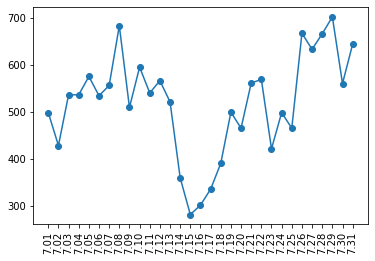

In [33]:
plt.plot(major_ticks, day_by_day_of['date'].iloc[july].value_counts().sort_index(), marker='o')
plt.xticks(major_ticks, rotation=90)
plt.show()

# 두산 팀타율 알아보기

In [34]:
dosan = regular_season.loc[regular_season['team'] == '두산', 'batter_id']
dosan=dosan.values
dosan = list(set(dosan))
dosan

[259,
 7,
 136,
 271,
 17,
 20,
 148,
 278,
 286,
 32,
 33,
 162,
 299,
 174,
 175,
 50,
 51,
 52,
 179,
 180,
 308,
 312,
 57,
 58,
 185,
 188,
 315,
 316,
 321,
 194,
 200,
 73,
 331,
 332,
 208,
 336,
 210,
 83,
 211,
 219,
 92,
 220,
 96,
 248,
 229,
 103,
 104,
 116,
 245,
 120,
 251,
 254]

In [35]:
#day_by_day_of.iloc[dosan]
day_dosan = day_by_day_of[day_by_day_of['batter_id'].isin(dosan)]
dosan_july=(day_dosan['date'] >= 7) & (day_dosan['date'] <8)

In [36]:
dosan_july

4747      False
4748      False
4749      False
4750      False
4751      False
          ...  
110223    False
110224    False
110225    False
110226    False
110227    False
Name: date, Length: 23769, dtype: bool

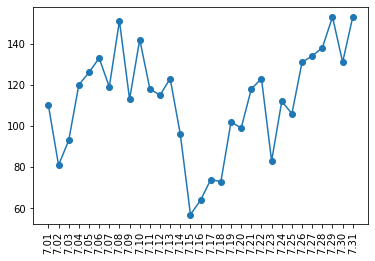

In [37]:
plt.plot(major_ticks, day_dosan['date'].loc[dosan_july].value_counts().sort_index(), marker='o')
plt.xticks(major_ticks, rotation=90)
plt.show()

In [38]:
dosan_s=day_dosan.loc[dosan_july].loc[day_by_day_of['AB'] >0]

In [39]:
print(dosan_s.groupby('date').mean())

# plt.plot(major_ticks, day_dosan['date'].loc[dosan_july].value_counts().sort_index(), marker='o')
# plt.xticks(major_ticks, rotation=90)
# plt.show()

       batter_id        AB         R         H        2B        3B        HR  \
date                                                                           
7.01  184.457143  2.885714  0.495238  0.952381  0.152381  0.000000  0.085714   
7.02  184.985915  3.070423  0.394366  0.746479  0.126761  0.028169  0.084507   
7.03  185.146341  2.963415  0.353659  0.731707  0.121951  0.000000  0.060976   
7.04  182.919643  2.991071  0.339286  0.812500  0.133929  0.008929  0.062500   
7.05  189.221239  3.106195  0.371681  0.814159  0.115044  0.035398  0.079646   
7.06  185.785714  2.937500  0.428571  0.839286  0.125000  0.026786  0.080357   
7.07  194.111111  2.944444  0.425926  0.879630  0.148148  0.055556  0.083333   
7.08  184.887218  3.045113  0.466165  0.932331  0.127820  0.037594  0.052632   
7.09  180.354167  3.156250  0.354167  0.927083  0.104167  0.010417  0.052083   
7.10  186.146341  2.943089  0.390244  0.772358  0.162602  0.024390  0.089431   
7.11  188.413462  2.855769  0.298077  0.